In [5]:
import sys
sys.path.append('..')

from __future__ import absolute_import

from importlib import reload
import paysage.batch
reload(paysage.batch)
import paysage.backends.pytorch_backend.nonlinearity
reload(paysage.backends.pytorch_backend.nonlinearity)
import paysage.backends.pytorch_backend.rand
reload(paysage.backends.pytorch_backend.rand)
import paysage.math_utils
reload(paysage.math_utils)
from paysage import batch
from paysage import layers
import paysage.models.model
reload(paysage.models.model)
from paysage.models import model
import paysage.fit
reload(paysage.fit)
from paysage import fit
from paysage import optimizers
from paysage import backends as be
from paysage import schedules

be.set_seed(137) # for determinism

import example_util as util

paysage_path=None
num_epochs=10
show_plot=False

num_hidden_units = 500
batch_size = 100
learning_rate = schedules.power_law_decay(initial=1e-2, coefficient=0.1)
mc_steps = 1

(_, _, shuffled_filepath) = \
        util.default_paths(paysage_path)

# set up the reader to get minibatches
# data = batch.HDFBatch(shuffled_filepath,
#                       'train/images',
#                       batch_size,
#                       transform=batch.binarize_color,
#                       train_fraction=0.99)

data = batch.NumpyBatch('../mnist/mnist.pkl.gz',
                        batch_size, True, limit=1e-2,
                        # input_transform=batch.binarize_color,
                        # numpy batch inputs are already binarized
                        target_transform=lambda x: be.onehot(x, 10))

import paysage.metrics
reload(paysage.metrics)

import paysage.layers
reload(paysage.layers)
from paysage.layers import ClassificationLayer

import paysage.backends
reload(paysage.backends)

import paysage.models
reload(paysage.models)
from paysage.models import model

import torch
torch.cuda.set_device(0)

# set up the model and initialize the parameters
vis_layer = layers.BernoulliLayer(data.ncols)
# vis_layer = layers.GaussianLayer(data.ncols)
hid_layer = layers.BernoulliLayer(num_hidden_units)
# hid_layer1 = layers.BernoulliLayer(num_hidden_units)
# hid_layer2 = layers.BernoulliLayer(num_hidden_units)
clf_layer = ClassificationLayer(10)

rbm = model.Model([vis_layer,
                   hid_layer,
                   clf_layer])
# rbm = model.Model([vis_layer, hid_layer1,
#                    hid_layer2, clf_layer])
# rbm.initialize(data)
rbm.initialize(data, 'glorot_normal')

metrics = ['ReconstructionError', 'EnergyDistance', 'EnergyGap', 'EnergyZscore', 'HeatCapacity', 'Accuracy',
           'CrossEntropy']
metrics = ['ReconstructionError', 'Accuracy', 'CrossEntropy']
perf = fit.ProgressMonitor(data, metrics=metrics)

# set up the optimizer and the fit method
opt = optimizers.ADAM(stepsize=learning_rate)
# opt = optimizers.Gradient(stepsize=learning_rate,
#                           tolerance=1e-4,
#                           ascent=True)

# sampler = paysage.fit.SequentialMC.from_batch(rbm, data)
sampler = paysage.fit.DrivenSequentialMC.from_batch(rbm, data)

# use a batch with targets
# hidden conditional mean has to take into account the weights with vis and also target -> it's already using it

sgd = fit.SGD(rbm, data, opt, 1000,
#              method=fit.cd,
             method=fit.pcd,
             sampler=sampler,
             mcsteps=mc_steps,
             monitor=perf)

# sgd = fit.SGD(rbm, data, opt, num_epochs,
#               sampler=sampler,
#               method=fit.tap, monitor=perf)

# fit the model
sgd.train()

End of epoch 0: 
-ReconstructionError: 9.671576
-Accuracy: 0.170000
-CrossEntropy: 2.291151
Epoch took 0.23 seconds

End of epoch 1: 
-ReconstructionError: 9.575008
-Accuracy: 0.210000
-CrossEntropy: 2.251151
Epoch took 0.22 seconds

End of epoch 2: 
-ReconstructionError: 9.612781
-Accuracy: 0.170000
-CrossEntropy: 2.291151
Epoch took 0.21 seconds

End of epoch 3: 
-ReconstructionError: 9.691753
-Accuracy: 0.170000
-CrossEntropy: 2.291151
Epoch took 0.23 seconds

End of epoch 4: 
-ReconstructionError: 9.474926
-Accuracy: 0.200000
-CrossEntropy: 2.261151
Epoch took 0.22 seconds

End of epoch 5: 
-ReconstructionError: 9.580396
-Accuracy: 0.250000
-CrossEntropy: 2.211151
Epoch took 0.23 seconds

End of epoch 6: 
-ReconstructionError: 9.377158
-Accuracy: 0.370000
-CrossEntropy: 2.091151
Epoch took 0.23 seconds

End of epoch 7: 
-ReconstructionError: 9.122842
-Accuracy: 0.410000
-CrossEntropy: 2.051151
Epoch took 0.22 seconds

End of epoch 8: 
-ReconstructionError: 9.030214
-Accuracy: 0.430

End of epoch 70: 
-ReconstructionError: 8.096248
-Accuracy: 0.710000
-CrossEntropy: 1.751151
Epoch took 0.21 seconds

End of epoch 71: 
-ReconstructionError: 8.125606
-Accuracy: 0.690000
-CrossEntropy: 1.771151
Epoch took 0.21 seconds

End of epoch 72: 
-ReconstructionError: 8.109490
-Accuracy: 0.600000
-CrossEntropy: 1.861151
Epoch took 0.21 seconds

End of epoch 73: 
-ReconstructionError: 7.966081
-Accuracy: 0.670000
-CrossEntropy: 1.791151
Epoch took 0.21 seconds

End of epoch 74: 
-ReconstructionError: 7.917741
-Accuracy: 0.610000
-CrossEntropy: 1.851151
Epoch took 0.21 seconds

End of epoch 75: 
-ReconstructionError: 7.881461
-Accuracy: 0.620000
-CrossEntropy: 1.841151
Epoch took 0.21 seconds

End of epoch 76: 
-ReconstructionError: 7.871041
-Accuracy: 0.690000
-CrossEntropy: 1.771151
Epoch took 0.22 seconds

End of epoch 77: 
-ReconstructionError: 7.886257
-Accuracy: 0.670000
-CrossEntropy: 1.791151
Epoch took 0.21 seconds

End of epoch 78: 
-ReconstructionError: 7.986679
-Accura

End of epoch 140: 
-ReconstructionError: 7.328247
-Accuracy: 0.770000
-CrossEntropy: 1.691151
Epoch took 0.21 seconds

End of epoch 141: 
-ReconstructionError: 7.366892
-Accuracy: 0.750000
-CrossEntropy: 1.711151
Epoch took 0.21 seconds

End of epoch 142: 
-ReconstructionError: 7.494019
-Accuracy: 0.750000
-CrossEntropy: 1.711151
Epoch took 0.21 seconds

End of epoch 143: 
-ReconstructionError: 7.509734
-Accuracy: 0.850000
-CrossEntropy: 1.611151
Epoch took 0.21 seconds

End of epoch 144: 
-ReconstructionError: 7.547899
-Accuracy: 0.790000
-CrossEntropy: 1.671151
Epoch took 0.21 seconds

End of epoch 145: 
-ReconstructionError: 7.542888
-Accuracy: 0.820000
-CrossEntropy: 1.641151
Epoch took 0.21 seconds

End of epoch 146: 
-ReconstructionError: 7.537780
-Accuracy: 0.820000
-CrossEntropy: 1.641151
Epoch took 0.21 seconds

End of epoch 147: 
-ReconstructionError: 7.496369
-Accuracy: 0.790000
-CrossEntropy: 1.671151
Epoch took 0.21 seconds

End of epoch 148: 
-ReconstructionError: 7.45879

End of epoch 209: 
-ReconstructionError: 7.037550
-Accuracy: 0.830000
-CrossEntropy: 1.631151
Epoch took 0.27 seconds

End of epoch 210: 
-ReconstructionError: 6.925384
-Accuracy: 0.870000
-CrossEntropy: 1.591151
Epoch took 0.21 seconds

End of epoch 211: 
-ReconstructionError: 6.958477
-Accuracy: 0.850000
-CrossEntropy: 1.611151
Epoch took 0.21 seconds

End of epoch 212: 
-ReconstructionError: 6.907927
-Accuracy: 0.880000
-CrossEntropy: 1.581151
Epoch took 0.21 seconds

End of epoch 213: 
-ReconstructionError: 6.970776
-Accuracy: 0.830000
-CrossEntropy: 1.631151
Epoch took 0.21 seconds

End of epoch 214: 
-ReconstructionError: 6.900759
-Accuracy: 0.810000
-CrossEntropy: 1.651151
Epoch took 0.21 seconds

End of epoch 215: 
-ReconstructionError: 6.977022
-Accuracy: 0.830000
-CrossEntropy: 1.631151
Epoch took 0.21 seconds

End of epoch 216: 
-ReconstructionError: 7.019872
-Accuracy: 0.820000
-CrossEntropy: 1.641151
Epoch took 0.21 seconds

End of epoch 217: 
-ReconstructionError: 7.06660

End of epoch 278: 
-ReconstructionError: 6.785785
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 279: 
-ReconstructionError: 6.780447
-Accuracy: 0.860000
-CrossEntropy: 1.601151
Epoch took 0.21 seconds

End of epoch 280: 
-ReconstructionError: 6.701644
-Accuracy: 0.880000
-CrossEntropy: 1.581151
Epoch took 0.20 seconds

End of epoch 281: 
-ReconstructionError: 6.704721
-Accuracy: 0.850000
-CrossEntropy: 1.611151
Epoch took 0.21 seconds

End of epoch 282: 
-ReconstructionError: 6.742131
-Accuracy: 0.870000
-CrossEntropy: 1.591151
Epoch took 0.21 seconds

End of epoch 283: 
-ReconstructionError: 6.700875
-Accuracy: 0.850000
-CrossEntropy: 1.611151
Epoch took 0.21 seconds

End of epoch 284: 
-ReconstructionError: 6.753744
-Accuracy: 0.880000
-CrossEntropy: 1.581151
Epoch took 0.21 seconds

End of epoch 285: 
-ReconstructionError: 6.852406
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 286: 
-ReconstructionError: 6.79821

End of epoch 347: 
-ReconstructionError: 6.595518
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.21 seconds

End of epoch 348: 
-ReconstructionError: 6.504158
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.22 seconds

End of epoch 349: 
-ReconstructionError: 6.466513
-Accuracy: 0.950000
-CrossEntropy: 1.511151
Epoch took 0.21 seconds

End of epoch 350: 
-ReconstructionError: 6.527861
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.20 seconds

End of epoch 351: 
-ReconstructionError: 6.432535
-Accuracy: 0.880000
-CrossEntropy: 1.581151
Epoch took 0.21 seconds

End of epoch 352: 
-ReconstructionError: 6.454341
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.20 seconds

End of epoch 353: 
-ReconstructionError: 6.443487
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 354: 
-ReconstructionError: 6.575428
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 355: 
-ReconstructionError: 6.59695

End of epoch 416: 
-ReconstructionError: 6.542452
-Accuracy: 0.870000
-CrossEntropy: 1.591151
Epoch took 0.21 seconds

End of epoch 417: 
-ReconstructionError: 6.504632
-Accuracy: 0.870000
-CrossEntropy: 1.591151
Epoch took 0.21 seconds

End of epoch 418: 
-ReconstructionError: 6.422191
-Accuracy: 0.880000
-CrossEntropy: 1.581151
Epoch took 0.21 seconds

End of epoch 419: 
-ReconstructionError: 6.377328
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 420: 
-ReconstructionError: 6.367067
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 421: 
-ReconstructionError: 6.335108
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 422: 
-ReconstructionError: 6.389151
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 423: 
-ReconstructionError: 6.447414
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 424: 
-ReconstructionError: 6.47067

End of epoch 485: 
-ReconstructionError: 6.194636
-Accuracy: 0.880000
-CrossEntropy: 1.581151
Epoch took 0.21 seconds

End of epoch 486: 
-ReconstructionError: 6.254130
-Accuracy: 0.840000
-CrossEntropy: 1.621151
Epoch took 0.21 seconds

End of epoch 487: 
-ReconstructionError: 6.184621
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 488: 
-ReconstructionError: 6.232438
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 489: 
-ReconstructionError: 6.203269
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 490: 
-ReconstructionError: 6.152293
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 491: 
-ReconstructionError: 6.153956
-Accuracy: 0.880000
-CrossEntropy: 1.581151
Epoch took 0.21 seconds

End of epoch 492: 
-ReconstructionError: 6.224040
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 493: 
-ReconstructionError: 6.25427

End of epoch 554: 
-ReconstructionError: 6.176999
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 555: 
-ReconstructionError: 6.175532
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 556: 
-ReconstructionError: 6.155613
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 557: 
-ReconstructionError: 6.161283
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 558: 
-ReconstructionError: 6.160782
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.21 seconds

End of epoch 559: 
-ReconstructionError: 6.175709
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 560: 
-ReconstructionError: 6.135132
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.20 seconds

End of epoch 561: 
-ReconstructionError: 6.114698
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 562: 
-ReconstructionError: 6.06001

End of epoch 623: 
-ReconstructionError: 6.054267
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 624: 
-ReconstructionError: 6.056054
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.21 seconds

End of epoch 625: 
-ReconstructionError: 6.077366
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 626: 
-ReconstructionError: 6.048095
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.23 seconds

End of epoch 627: 
-ReconstructionError: 6.041161
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.21 seconds

End of epoch 628: 
-ReconstructionError: 6.045343
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.21 seconds

End of epoch 629: 
-ReconstructionError: 6.052615
-Accuracy: 0.890000
-CrossEntropy: 1.571151
Epoch took 0.21 seconds

End of epoch 630: 
-ReconstructionError: 6.032549
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 631: 
-ReconstructionError: 6.01936

End of epoch 692: 
-ReconstructionError: 6.059084
-Accuracy: 0.950000
-CrossEntropy: 1.511151
Epoch took 0.21 seconds

End of epoch 693: 
-ReconstructionError: 6.015352
-Accuracy: 0.950000
-CrossEntropy: 1.511151
Epoch took 0.21 seconds

End of epoch 694: 
-ReconstructionError: 6.011766
-Accuracy: 0.960000
-CrossEntropy: 1.501151
Epoch took 0.21 seconds

End of epoch 695: 
-ReconstructionError: 5.975386
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.21 seconds

End of epoch 696: 
-ReconstructionError: 5.941400
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 697: 
-ReconstructionError: 5.971606
-Accuracy: 0.950000
-CrossEntropy: 1.511151
Epoch took 0.21 seconds

End of epoch 698: 
-ReconstructionError: 5.920199
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 699: 
-ReconstructionError: 5.938428
-Accuracy: 0.960000
-CrossEntropy: 1.501151
Epoch took 0.21 seconds

End of epoch 700: 
-ReconstructionError: 5.93487

-ReconstructionError: 5.945153
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.22 seconds

End of epoch 762: 
-ReconstructionError: 5.959624
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 763: 
-ReconstructionError: 5.908766
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 764: 
-ReconstructionError: 5.925745
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.20 seconds

End of epoch 765: 
-ReconstructionError: 5.965684
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.21 seconds

End of epoch 766: 
-ReconstructionError: 6.014111
-Accuracy: 0.960000
-CrossEntropy: 1.501151
Epoch took 0.21 seconds

End of epoch 767: 
-ReconstructionError: 5.979281
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.21 seconds

End of epoch 768: 
-ReconstructionError: 5.967981
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 769: 
-ReconstructionError: 5.957932
-Accuracy: 0.9200

-ReconstructionError: 5.918252
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 831: 
-ReconstructionError: 5.925159
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.21 seconds

End of epoch 832: 
-ReconstructionError: 5.880437
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.21 seconds

End of epoch 833: 
-ReconstructionError: 5.873797
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.20 seconds

End of epoch 834: 
-ReconstructionError: 5.837413
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 835: 
-ReconstructionError: 5.873105
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 836: 
-ReconstructionError: 5.876682
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.21 seconds

End of epoch 837: 
-ReconstructionError: 5.817015
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.21 seconds

End of epoch 838: 
-ReconstructionError: 5.805406
-Accuracy: 0.9500

End of epoch 900: 
-ReconstructionError: 5.845351
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.21 seconds

End of epoch 901: 
-ReconstructionError: 5.776238
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.23 seconds

End of epoch 902: 
-ReconstructionError: 5.828956
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 903: 
-ReconstructionError: 5.830544
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 904: 
-ReconstructionError: 5.920964
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.22 seconds

End of epoch 905: 
-ReconstructionError: 5.843239
-Accuracy: 0.950000
-CrossEntropy: 1.511151
Epoch took 0.22 seconds

End of epoch 906: 
-ReconstructionError: 5.876064
-Accuracy: 0.960000
-CrossEntropy: 1.501151
Epoch took 0.26 seconds

End of epoch 907: 
-ReconstructionError: 5.815114
-Accuracy: 0.960000
-CrossEntropy: 1.501151
Epoch took 0.33 seconds

End of epoch 908: 
-ReconstructionError: 5.78949

End of epoch 969: 
-ReconstructionError: 5.774094
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.23 seconds

End of epoch 970: 
-ReconstructionError: 5.767758
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.27 seconds

End of epoch 971: 
-ReconstructionError: 5.817364
-Accuracy: 0.900000
-CrossEntropy: 1.561151
Epoch took 0.22 seconds

End of epoch 972: 
-ReconstructionError: 5.786164
-Accuracy: 0.940000
-CrossEntropy: 1.521151
Epoch took 0.21 seconds

End of epoch 973: 
-ReconstructionError: 5.867076
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.21 seconds

End of epoch 974: 
-ReconstructionError: 5.782308
-Accuracy: 0.920000
-CrossEntropy: 1.541151
Epoch took 0.25 seconds

End of epoch 975: 
-ReconstructionError: 5.791697
-Accuracy: 0.910000
-CrossEntropy: 1.551151
Epoch took 0.37 seconds

End of epoch 976: 
-ReconstructionError: 5.812951
-Accuracy: 0.930000
-CrossEntropy: 1.531151
Epoch took 0.34 seconds

End of epoch 977: 
-ReconstructionError: 5.80533

### priorities:
* cd - OK, pcd - OK (both: Accuracy 0.92 at 1000 epochs), tap - needs work in layer
* sequential - OK, driven_sequential - OK
* gradient - not working, adam - OK
* gaussian inputs - OK - too slow with lr=1e-1
* numpy batch feed - DONE

### TODO:
* make DBM work
* regression - gaussian/exponential/poisson outputs 
* try to use autograd
* multimodality of inputs

In [22]:
# evaluate the model    
util.show_metrics(rbm, perf)
valid = data.get('validate')

Final performance metrics:
-ReconstructionError: 5.772199
-Accuracy: 0.910000
-CrossEntropy: 1.551151


In [23]:
%matplotlib inline


Plot a random sample of reconstructions
[0 4 8 1 9 9 5 2 8 6]


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


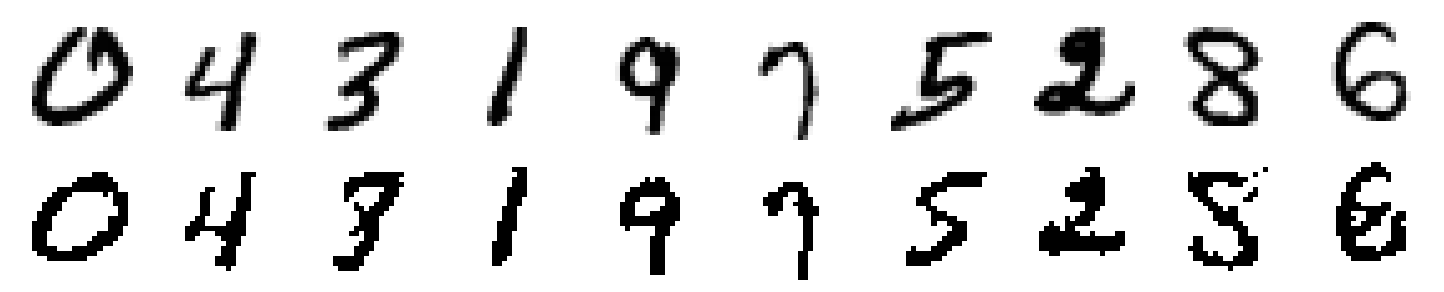

In [29]:
import example_util
reload(example_util)
import example_util as util
util.show_reconstructions(rbm, valid, fit, show_plot=True, n_recon=10, vertical=False)


Plot a random sample of fantasy particles


/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


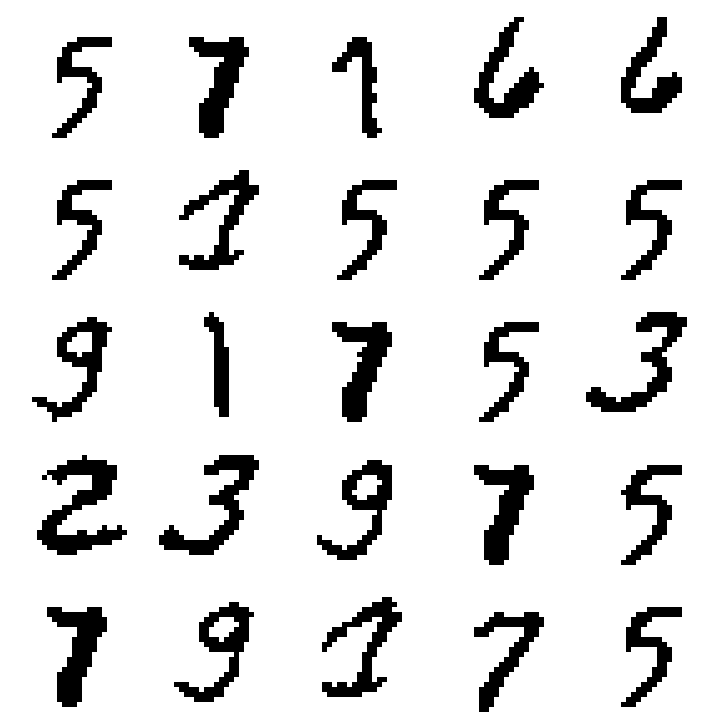


Plot a random sample of the weights


In [ ]:
util.show_fantasy_particles(rbm, valid, fit, show_plot=True, n_fantasy=25)
util.show_weights(rbm, show_plot=True, n_weights=25)